<a href="https://colab.research.google.com/github/tydesharnais/Genre_Classifacation/blob/test_outputs/TryCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Common Imports


In [ ]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD
from keras.layers import GaussianNoise
from keras.regularizers import l1,l2
from keras.wrappers.scikit_learn import KerasClassifier



from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.metrics import roc_auc_score, roc_curve 

 

Mostly custom made scripts for analysis

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from prepare import load_Data, handle_nulls, prepare_df, change_dtypes
from preprocessing import spotify_split, scale_data, create_features
from explore import param_viz, corr_heatmap, catplot_viz
from librosa_Visuals import visualize_Chromagram_y_Spectogram
import importlib

In [ ]:
# output directory name:
output_dir = 'model_output/Classical'
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Read in the Final Dataframe, create features, and change dtypes

In [ ]:
df = pd.read_csv('final_dataframe.csv')
df.drop_duplicates()
df = create_features(df)
df = change_dtypes(df)
#.loc accepts the same slice notation that Python lists do for both row and columns. Slice notation being start:stop:step
df = df.drop(columns=['song', 'artist', 
                        'year', 'duration_minutes', 
                        'duration_seconds', 'explicit','Unnamed: 0', 'has_feat'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 72 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       1553 non-null   int64  
 1   popularity        1553 non-null   int64  
 2   danceability      1553 non-null   float64
 3   energy            1553 non-null   float64
 4   key               1553 non-null   int64  
 5   loudness          1553 non-null   float64
 6   mode              1553 non-null   int64  
 7   speechiness       1553 non-null   float64
 8   acousticness      1553 non-null   float64
 9   instrumentalness  1553 non-null   float64
 10  liveness          1553 non-null   float64
 11  valence           1553 non-null   float64
 12  tempo             1553 non-null   float64
 13  genre             1553 non-null   object 
 14  rolloff-mean      1553 non-null   float64
 15  rolloff-var       1553 non-null   float64
 16  bandwidth-mean    1553 non-null   float64


Split The Data (Train/Test/Split)


In [ ]:
# split the data
X_train, y_train, X_validate, y_validate, X_test, y_test, train, validate, test = spotify_split(df, 'popularity')


df.head(5)

Shape of train: (1087, 71) | Shape of validate: (233, 71) | Shape of test: (233, 71)
Percent train: 70.0        | Percent validate: 15.0       | Percent test: 15.0


,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,mfcc16-var,mfcc17-mean,mfcc17-var,mfcc18-mean,mfcc18-var,mfcc19-mean,mfcc19-var,mfcc20-mean,mfcc20-var,pop_strat_bin
0,167066,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,...,49.540234,-10.766699,40.957855,2.846781,37.664841,-8.010398,53.910786,4.632807,49.577885,High
1,250546,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,...,67.451675,-6.909035,59.591549,4.348592,64.247726,-6.544967,63.401611,4.868826,74.108719,Moderate
2,253733,69,0.706,0.888,2,-6.959,1,0.0654,0.1190,0.000096,...,53.071110,-8.706938,43.762806,7.403339,54.926430,-5.305090,42.727299,5.402428,43.845890,Moderate
3,284200,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,...,102.235100,-6.613147,71.165733,7.186368,77.046379,-5.840513,98.752052,0.320733,67.831230,High
4,258560,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.000000,...,71.773346,-4.024668,58.077763,7.637428,52.070301,-3.748215,69.181046,8.299438,65.899231,Moderate


Data Exploration

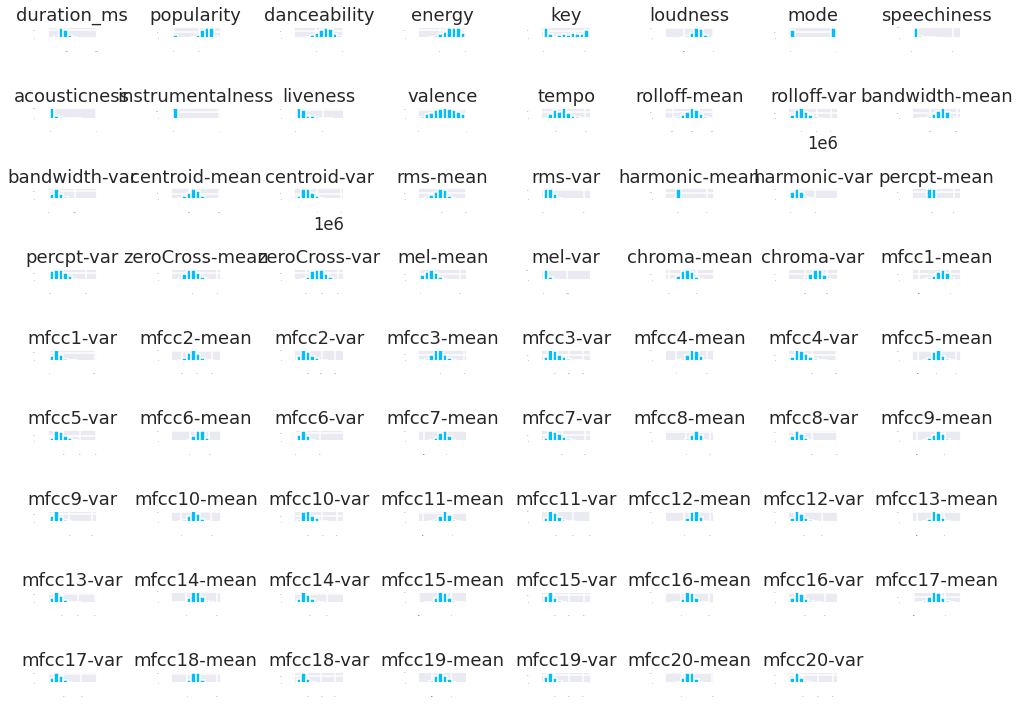

In [ ]:
df.hist(xlabelsize=1,ylabelsize=1)
plt.tight_layout()

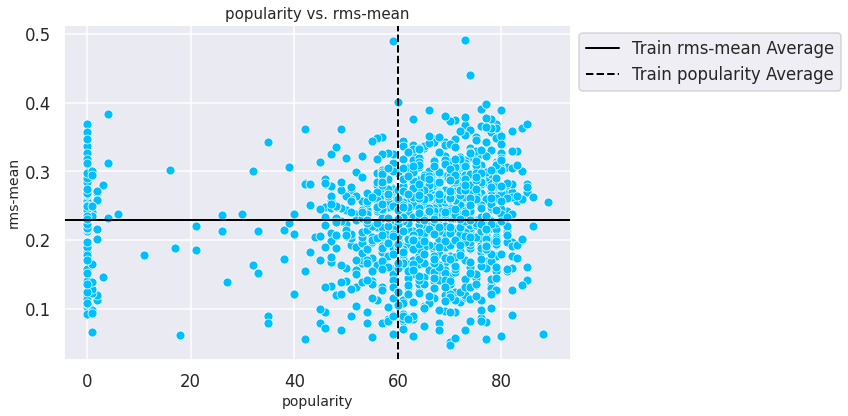

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


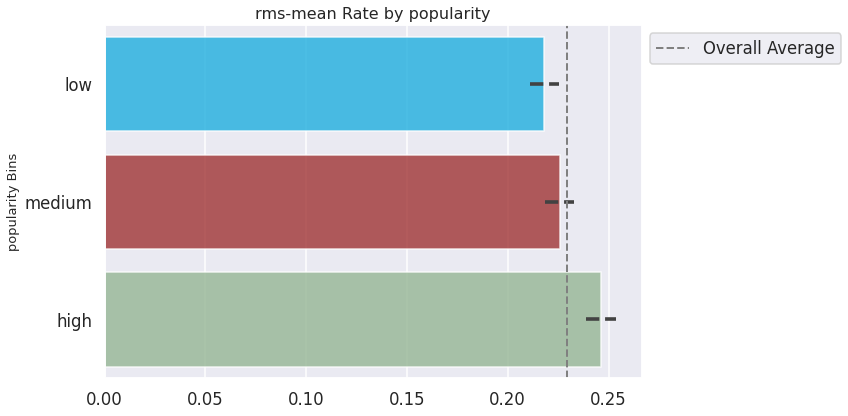

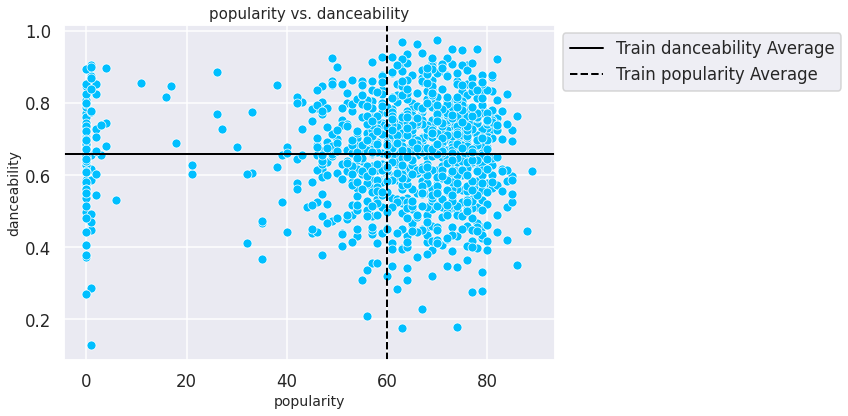

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


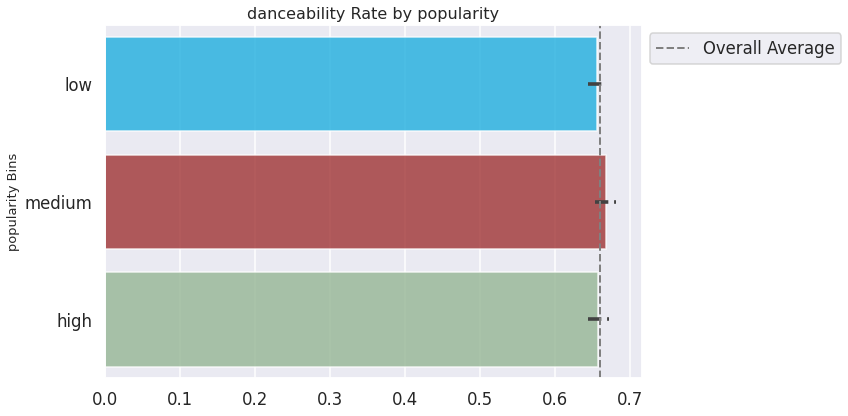

In [ ]:
param_viz(train, 'popularity', 'rms-mean')
param_viz(train, 'popularity', 'danceability')

Visualize Chromagram and Spectogram of different songs

21 Guns - Green Day


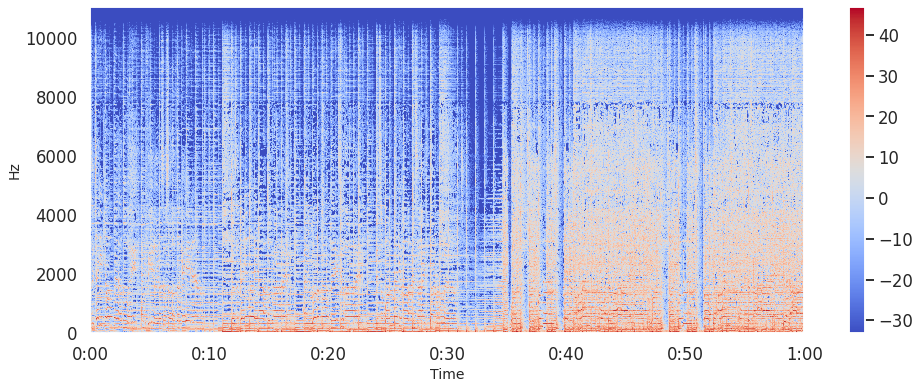

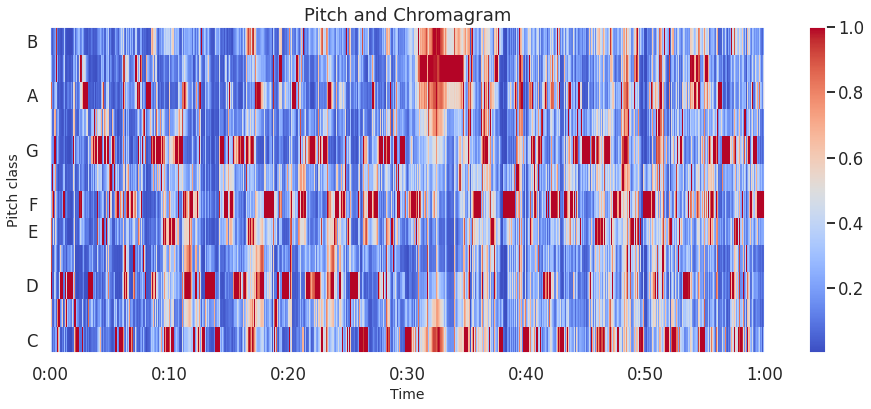

6 foot 7 foot - WEEZY F BABY


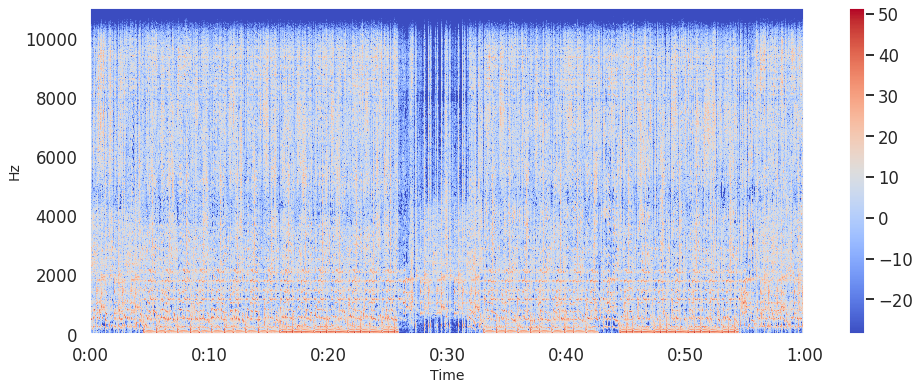

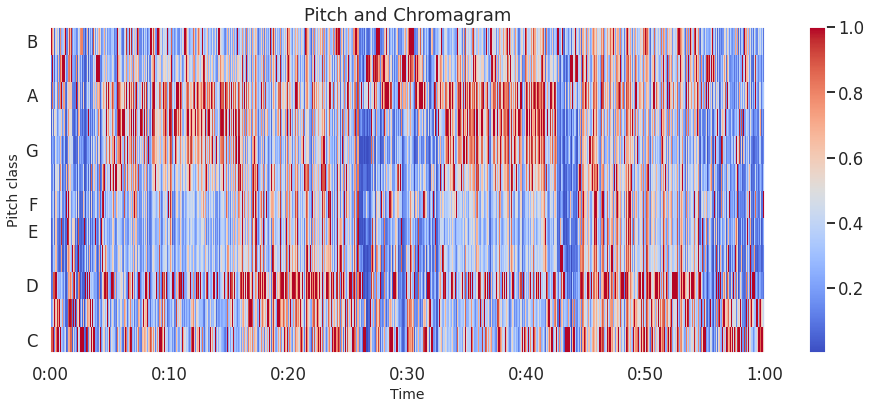

Animals - That body of yours is absurd Adam Levine (Maroon 5)


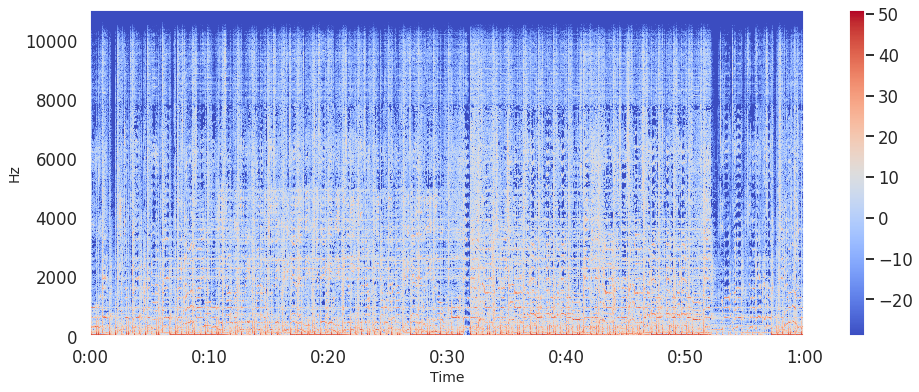

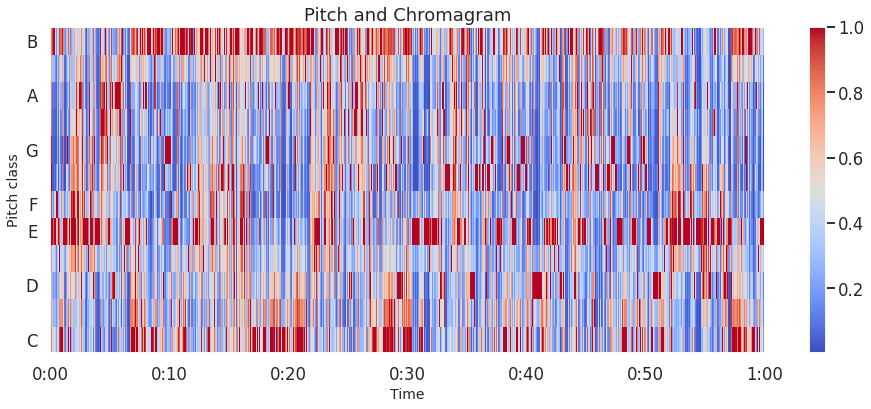

In [ ]:
print('21 Guns - Green Day')
visualize_Chromagram_y_Spectogram('/content/sample_wav/21 guns_green day.wav')
print('6 foot 7 foot - WEEZY F BABY')
visualize_Chromagram_y_Spectogram('/content/sample_wav/6 foot 7 foot_lil wayne.wav')
print('Animals - That body of yours is absurd Adam Levine (Maroon 5)')
visualize_Chromagram_y_Spectogram('/content/sample_wav/animals_maroon 5.wav')

Which Features correlate strongly with popularity?

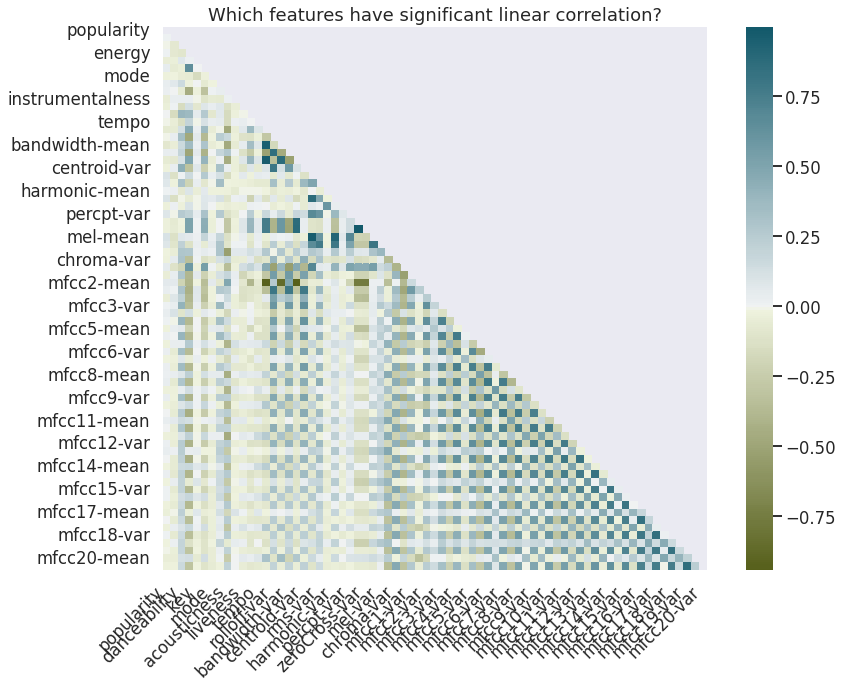

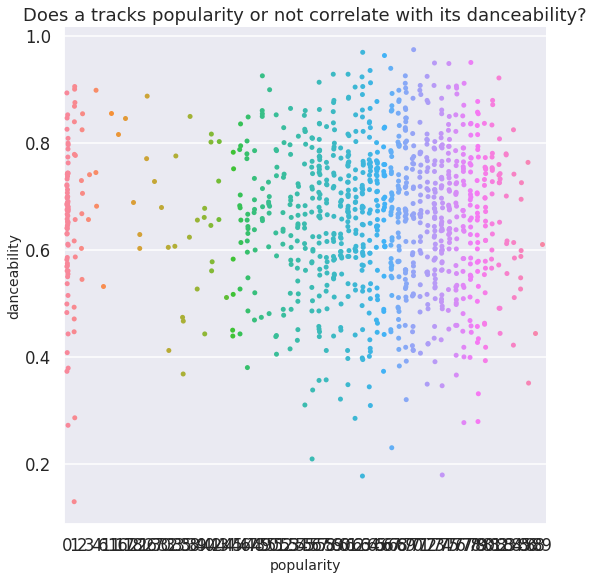

In [ ]:
corr_heatmap(train, 'popularity')
catplot_viz(train,'popularity', 'danceability','strip' )

Check Distrubution and Make Bins!

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


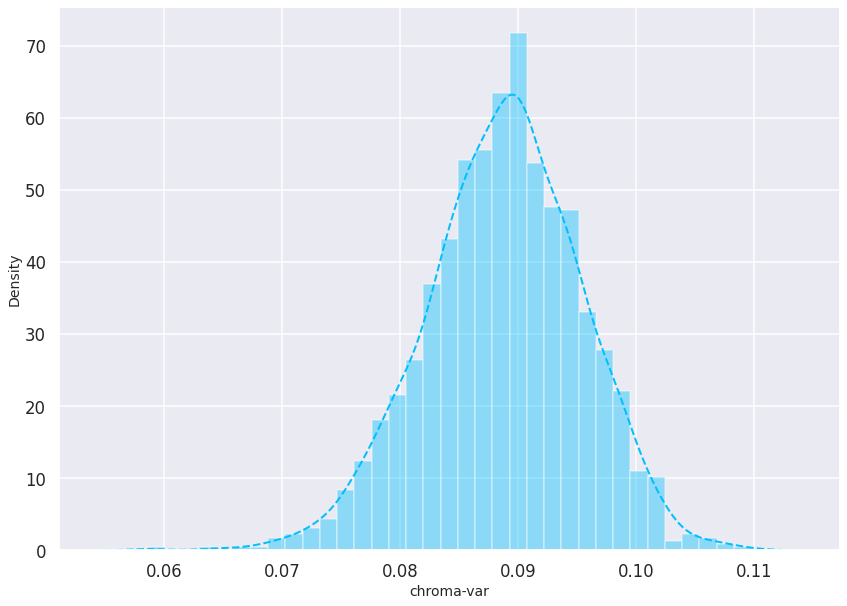

0     96
69    60
74    57
73    56
68    55
      ..
27     1
28     1
24     1
16     1
7      1
Name: popularity, Length: 76, dtype: int64
low     783
high    770
Name: danceability_bins, dtype: int64
low     777
high    776
Name: chroma_mean_bins, dtype: int64


In [ ]:
import seaborn as sns
sns.distplot(df['chroma-var'])
plt.show()
print(df['popularity'].value_counts())
df['danceability_bins'] = pd.qcut(x=df['danceability'], q=2, labels=['low','high'])
df['chroma_mean_bins'] = pd.qcut(x=df['chroma-mean'], q=2, labels=['low','high'])
print(df['danceability_bins'].value_counts())
print(df['chroma_mean_bins'].value_counts())

Checking the bin counts and variance!

In [ ]:
#by popularity
df['danceability_bins'].head(5)
high_dance = df[df['danceability_bins']=='high']['popularity']
low_dance = df[df['danceability_bins']=='low']['popularity']
print('Danceability by Popularity')
print(high_dance.var())
print(low_dance.var())
df['chroma_mean_bins'].head(5)
chroma_high = df[df['chroma_mean_bins']=='high']['popularity']
chroma_low = df[df['chroma_mean_bins']=='low']['popularity']
print('Chromagram Mean by Popularity')
print(chroma_high.var())
print(chroma_low.var())

Danceability by Popularity
454.7665613969905
454.09838544779893
Chromagram Mean by Popularity
407.75273694712337
500.71987156523244


Statistical T-Test for Chroma and Danceability

In [ ]:
# statistical analysis imports
from math import sqrt
from scipy import stats

alpha = 0.05
print("Compute test statistic and probability (t-statistic & p-value)")
t, p = stats.ttest_ind(high_dance, low_dance, equal_var = True)
print('Test statistic:', t, '\np-value:', p/2, '\nalpha:', alpha)
    
print('\n---\n')
    
null_hypothesis = "there is no significant difference between the mean danceability of high valence tracks and low-valence tracks."
if p/2 < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis.")
        
print('\n---\n')
          
print('mean of low-dance songs:', low_dance.mean(), '\nmean of high_dance songs:', high_dance.mean())

Compute test statistic and probability (t-statistic & p-value)
Test statistic: -0.3086355323134505 
p-value: 0.3788201185194002 
alpha: 0.05

---

We fail to reject the null hypothesis.

---

mean of low-dance songs: 59.99106002554279 
mean of high_dance songs: 59.65714285714286


In [ ]:
# statistical analysis imports
from math import sqrt
from scipy import stats

alpha = 0.05
print("Compute test statistic and probability (t-statistic & p-value)")
t, p = stats.ttest_ind(chroma_high, chroma_low, equal_var = True)
print('Test statistic:', t, '\np-value:', p/2, '\nalpha:', alpha)
    
print('\n---\n')
    
null_hypothesis = "there is no significant difference between the mean danceability of high valence tracks and low-valence tracks."
if p/2 < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis.")
        
print('\n---\n')
          
print('mean of low-Chroma songs:', chroma_low.mean(), '\nmean of high-Chroma songs:', chroma_high.mean())

Compute test statistic and probability (t-statistic & p-value)
Test statistic: 0.8081970524110961 
p-value: 0.2095505469633021 
alpha: 0.05

---

We fail to reject the null hypothesis.

---

mean of low-Chroma songs: 59.38867438867439 
mean of high-Chroma songs: 60.26288659793814


Okay! It is finally time to actually process the Data Frame in all its glory

In [ ]:
real_DF = pd.read_csv('final_dataframe.csv')
real_DF.drop_duplicates()
real_DF = create_features(real_DF)
real_DF = change_dtypes(real_DF)
#.loc accepts the same slice notation that Python lists do for both row and columns. Slice notation being start:stop:step
real_DF = real_DF.drop(columns=['song', 'artist', 
                        'year', 'duration_minutes', 
                        'duration_seconds', 'explicit','Unnamed: 0', 'has_feat'])
real_DF = real_DF.reindex(columns = [col for col in real_DF.columns if col != 'genre'] + ['genre'])
real_DF['genre'] = real_DF['genre'].str.split(',').str[0]
real_DF['genre'] = real_DF['genre'].astype('string')
real_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 72 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       1553 non-null   int64  
 1   popularity        1553 non-null   int64  
 2   danceability      1553 non-null   float64
 3   energy            1553 non-null   float64
 4   key               1553 non-null   int64  
 5   loudness          1553 non-null   float64
 6   mode              1553 non-null   int64  
 7   speechiness       1553 non-null   float64
 8   acousticness      1553 non-null   float64
 9   instrumentalness  1553 non-null   float64
 10  liveness          1553 non-null   float64
 11  valence           1553 non-null   float64
 12  tempo             1553 non-null   float64
 13  rolloff-mean      1553 non-null   float64
 14  rolloff-var       1553 non-null   float64
 15  bandwidth-mean    1553 non-null   float64
 16  bandwidth-var     1553 non-null   float64


Lets Extract and scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler

#real_DF.iloc[:,-1]
genre_Classification = real_DF.iloc[:,-1]
convert = LabelEncoder()
y = convert.fit_transform(genre_Classification)
print('Features')
print(real_DF.iloc[:,:-1])
print('Labels')
real_DF.iloc[:,-1] = y
print(real_DF.iloc[:,-1])


Features
      duration_ms  popularity  danceability  energy  key  loudness  mode  \
0          167066          79         0.434   0.897    0    -4.918     1   
1          250546          66         0.529   0.496    7    -9.007     1   
2          253733          69         0.706   0.888    2    -6.959     1   
3          284200          86         0.949   0.661    5    -4.244     0   
4          258560          68         0.708   0.772    7    -4.264     1   
...           ...         ...           ...     ...  ...       ...   ...   
1548       181026          79         0.842   0.734    1    -5.065     0   
1549       178426          78         0.552   0.702    9    -5.707     1   
1550       200593          69         0.847   0.678    9    -8.635     1   
1551       171029          75         0.741   0.520    8    -7.513     1   
1552       215280          85         0.695   0.762    0    -3.497     1   

      speechiness  acousticness  instrumentalness  ...  mfcc16-mean  \
0      

In [ ]:
fit = StandardScaler()
new_Y = real_DF['genre']
X = real_DF.loc[:, real_DF.columns != 'genre']
cols = X.columns
np_Scaled = fit.fit_transform(X)
X = pd.DataFrame(np_Scaled, columns = cols)

n_classes = new_Y.nunique()
print(n_classes)

12


TRAIN TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, new_Y, test_size=0.3, random_state=42)
print(X_train.shape[0])


1087


MODELING

In [ ]:

model = Sequential()

model.add(Dense(256,input_shape=X_train.shape[1:],activation='linear', activity_regularizer=l1(0.1), kernel_regularizer=l2(.001)))
model.add(GaussianNoise(0.1))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(0.3))

model.add(Dense(200,kernel_regularizer=l2(.001)))
#model.add(GaussianNoise(0.1))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128,kernel_regularizer=l2(.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation ='relu',kernel_regularizer=l2(.001)))
model.add(Dropout(0.2))
model.add(Dense(32, activation ='relu',kernel_regularizer=l2(.001)))
model.add(Dropout(0.2))
model.add(Dense(n_classes,activation ='softmax'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               18432     
                                                                 
 gaussian_noise_6 (GaussianN  (None, 256)              0         
 oise)                                                           
                                                                 
 activation_12 (Activation)  (None, 256)               0         
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               65792     
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                      

In [ ]:
opt = Adam(learning_rate=1e-3,decay=1e-5)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Epoch 1/100
34/34 [==============================] - 2s 12ms/step - loss: 12.8335 - accuracy: 0.3827 - val_loss: 10.2967 - val_accuracy: 0.5107
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 9.2478 - accuracy: 0.4591 - val_loss: 8.1443 - val_accuracy: 0.4871
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 7.4070 - accuracy: 0.4756 - val_loss: 6.7168 - val_accuracy: 0.5343
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 6.1078 - accuracy: 0.4775 - val_loss: 5.5958 - val_accuracy: 0.5923
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 5.1100 - accuracy: 0.4959 - val_loss: 4.7480 - val_accuracy: 0.5408
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 4.3331 - accuracy: 0.5621 - val_loss: 4.1415 - val_accuracy: 0.6137
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 3.7893 - accuracy: 0.6109 - val_loss: 3.6018 - val_accuracy: 0.6266
Epoch 8/10

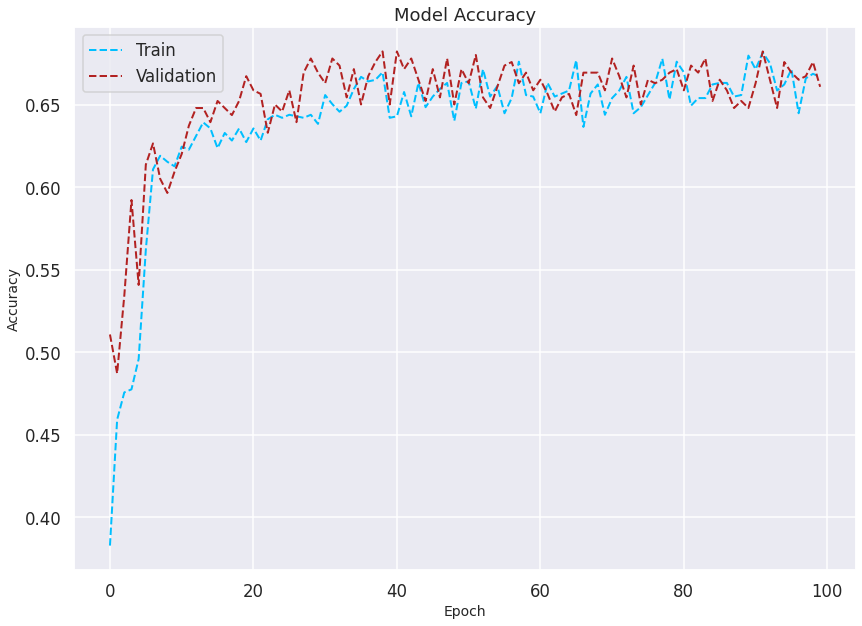

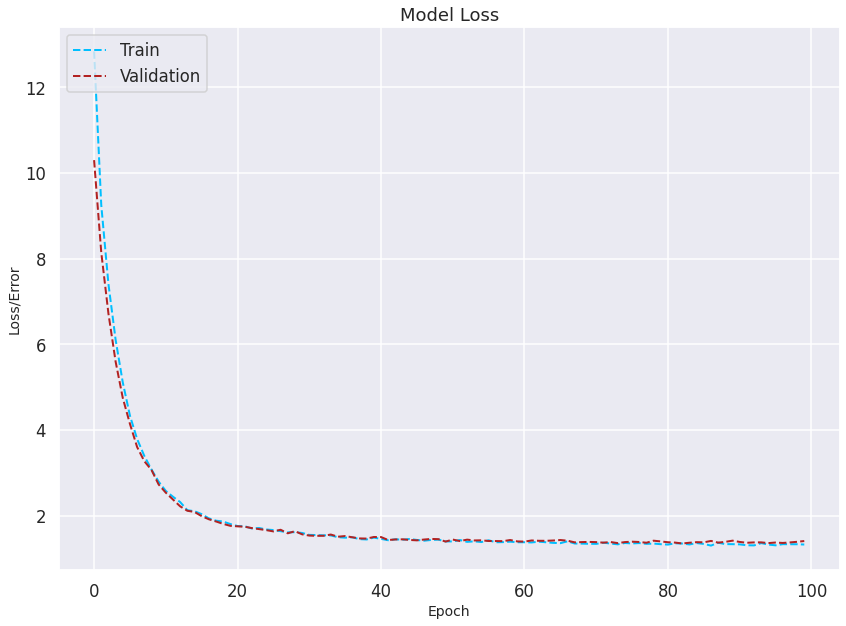

In [ ]:

history = model.fit(X_train, y_train, batch_size=32, epochs=100 ,verbose=1,validation_data=(X_test,y_test))
test_loss, test_acc = model.evaluate(X_test,y_test)
print("test accuracy: ", test_acc)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# def create_model(X_train):
#   model = Sequential()
#   model.add(Dense(256,activation='linear', activity_regularizer=l1(.1), kernel_regularizer=l2(0.1), input_shape=X_train.shape[1:],))
#   model.add(Activation('relu'))

#   model.add(Dense(128))
#   #model.add(GaussianNoise(0.1))
#   model.add(Activation('relu'))
#   #model.add(Dropout(0.2))

#   model.add(Dense(64, activation ='relu'))
#   # model.add(Dropout(0.2))
#   model.add(Dense(32, activation ='relu'))
#   # model.add(Dropout(0.2))
#   model.add(Dense(12,activation ='softmax'))
#   model.summary()
#   #model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#   return model

In [ ]:
# opt = Adam(lr=1e-3,decay=1e-5)
# test_accuracy = []
# epoch_acc = []
# learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
# epochs = [0,10,20,50,100]
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# for i in range(len(epochs)):
#   model = create_model(X_train)
#   model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(learning_rate=0.01,momentum=0), metrics=['accuracy'])
#   history = model.fit(X_train, y_train, batch_size=32, epochs=epochs[i] ,verbose=1,validation_data=(X_test,y_test), callbacks=[modelcheckpoint])
#   test_loss, test_acc = model.evaluate(X_test,y_test)
#   print("test accuracy: ", test_acc)
#   epoch_acc.append((test_acc, epochs[i]))
# max_tuple = max(epoch_acc, key=lambda tup: tup[0])
# print(epoch_acc)
# print(max_tuple)

In [ ]:
model.load_weights(output_dir+"/weights.03.hdf5") 

NameError: ignored

In [ ]:
y_hat = model.predict(X_test)

15/15 [==============================] - 0s 4ms/step


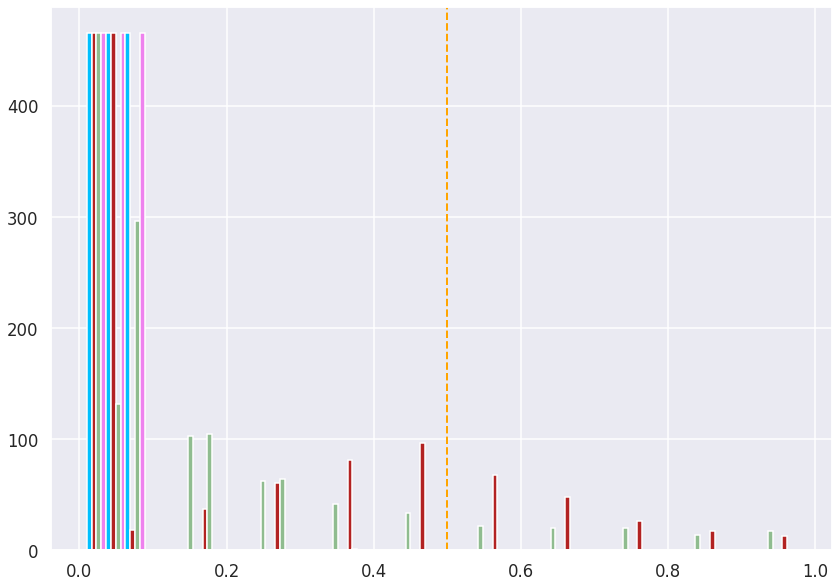

In [ ]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [ ]:
"{:0.2f}".format(roc_auc_score(y_test, y_hat)*100.0)

ValueError: ignored

In [ ]:
fpr , tpr , thresholds = roc_curve (y_test , y_hat)
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

ValueError: ignored

In [ ]:
def create_model(X_train):
  model = Sequential()
  model.add(Dense(256,activation='linear', activity_regularizer=l1(.1), kernel_regularizer=l2(0.1), input_shape=X_train.shape[1:],))
  model.add(Activation('relu'))

  model.add(Dense(128))
  #model.add(GaussianNoise(0.1))
  model.add(Activation('relu'))
  #model.add(Dropout(0.2))

  model.add(Dense(64, activation ='relu'))
  # model.add(Dropout(0.2))
  model.add(Dense(32, activation ='relu'))
  # model.add(Dropout(0.2))
  model.add(Dense(12,activation ='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

  


Model Testing
